In [28]:
# initialized package & connection to DBA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import psycopg2 as pg

# read pwd string from save file
with open('postgrest_pwd.txt', 'r') as f:
    pwd = f.readline()

# read data from table to datatframe with Month form 201801
table = 'mis_cc_kpi_m'
with pg.connect(database='ktc', user='postgres', password=pwd) as con:
    oss = pd.read_sql('select * from ' + table + ' where "month"::bigint >= 201801 and channel = \'OSS\'', con = con)

In [34]:
# EDA on age and 1st spending days
# EDA on age
print(oss['age'].describe())

count    106172.000000
mean         33.039163
std           8.801666
min         -76.000000
25%          26.000000
50%          31.000000
75%          38.000000
max          82.000000
Name: age, dtype: float64


Using matplotlib backend: MacOSX


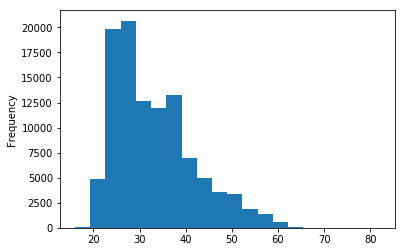

In [38]:
# exclude outliner age < 15
%matplotlib
oss.loc[oss.age > 15]['age'].plot.hist(bins = 20)

In [41]:
# EDA on 1st spending day
print(oss['no_transaction_date'].describe())

count    25474.000000
mean        24.846392
std         22.693406
min          0.000000
25%         10.000000
50%         17.000000
75%         31.000000
max        158.000000
Name: no_transaction_date, dtype: float64


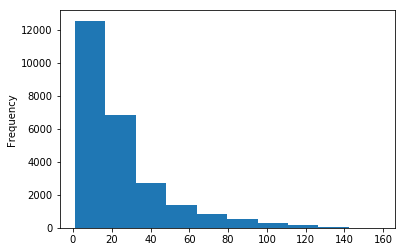

In [46]:
oss.loc[oss.no_transaction_date > 0]['no_transaction_date'].plot.hist()

In [96]:
# K-means clustering on age and 1st spending day
# import package
import numpy as np
from sklearn.cluster import KMeans

df = oss.loc[(oss.age >= 15) & (oss.no_transaction_date > 0)][['age', 'no_transaction_date']]
M = df.values
kmeans = KMeans(n_clusters=5).fit(M)

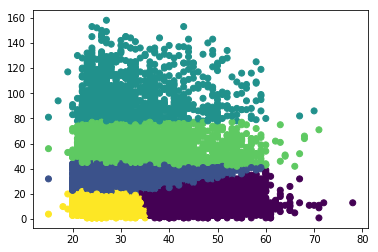

In [98]:
plt.scatter(M[:,0], M[:,1], c = kmeans.labels_, cmap = 'viridis')